<a href="https://colab.research.google.com/github/shksherry/Dynamic-Offloading-of-ANN-Model-Algorithm-Analysis/blob/main/Dynamic_Offloading_of_ANN_Model_Algorithm_Analysis_in_(Smart_home_dataset)_Code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv("cloud final1.csv")

In [ ]:
data.head()

,QoS (Resp. Time),Energy (V),Bandwidth (kbps),Decision 1,Decision 2,Decision3,Output
0,0.3,1,616,1,1,1,1.0
1,0.5,2,792,1,1,1,1.0
2,0.6,3,766,0,0,1,0.0
3,0.7,4,696,0,0,1,0.0
4,0.8,2,502,0,1,1,0.0


In [ ]:
data['Output']

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
9994    1.0
9995    0.0
9996    0.0
9997    4.0
9998    0.0
Name: Output, Length: 9999, dtype: float64

In [ ]:
data['Output'].unique()

array([1.  , 0.  , 0.11, 2.  , 4.  ])

In [ ]:
data.count()

QoS (Resp. Time)    9999
Energy (V)          9999
Bandwidth (kbps)    9999
Decision 1          9999
Decision 2          9999
Decision3           9999
Output              9999
dtype: int64

In [ ]:
print(data.isnull().sum())


print("Total Null values count: ",
      data.isnull().sum().sum())

QoS (Resp. Time)    0
Energy (V)          0
Bandwidth (kbps)    0
Decision 1          0
Decision 2          0
Decision3           0
Output              0
dtype: int64
Total Null values count:  0


In [ ]:
print("Value of class 1",
      data[data['Output'] >0].count())

Value of class 1 QoS (Resp. Time)    1529
Energy (V)          1529
Bandwidth (kbps)    1529
Decision 1          1529
Decision 2          1529
Decision3           1529
Output              1529
dtype: int64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

In [ ]:
data.shape

(9999, 7)

In [ ]:
data.dtypes

QoS (Resp. Time)    float64
Energy (V)            int64
Bandwidth (kbps)      int64
Decision 1            int64
Decision 2            int64
Decision3             int64
Output              float64
dtype: object

In [ ]:
data.isnull().sum()

QoS (Resp. Time)    0
Energy (V)          0
Bandwidth (kbps)    0
Decision 1          0
Decision 2          0
Decision3           0
Output              0
dtype: int64

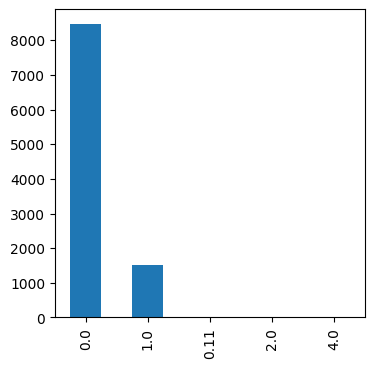

In [ ]:
bar_graph('Output')

In [ ]:
def bar_graph(feature):
    plt.figure(figsize=(4,4),dpi=100)
    data[feature].value_counts().plot(kind="bar")

In [ ]:
data.columns

Index(['QoS (Resp. Time)', 'Energy (V)', 'Bandwidth (kbps)', 'Decision 1',
       'Decision 2', 'Decision3', 'Output'],
      dtype='object')

<ipython-input-67-36c77321f4c2>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data = data.dropna('columns')# drop columns with NaN


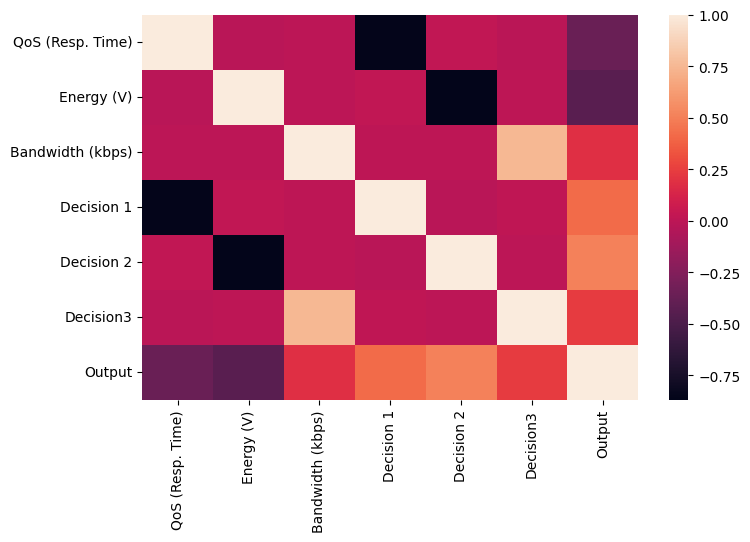

In [ ]:
data = data.dropna('columns')# drop columns with NaN

data = data[[col for col in data if data[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = data.corr()

plt.figure(figsize=(8,5))

sns.heatmap(corr)

plt.show()

# New Section

In [ ]:
corr

,QoS (Resp. Time),Energy (V),Bandwidth (kbps),Decision 1,Decision 2,Decision3,Output
QoS (Resp. Time),1.000000,-0.016213,-0.006151,-0.856406,0.018149,-0.013767,-0.363047
Energy (V),-0.016213,1.000000,-0.005578,0.017199,-0.868325,0.001470,-0.433928
Bandwidth (kbps),-0.006151,-0.005578,1.000000,0.000619,0.003979,0.746360,0.184699
Decision 1,-0.856406,0.017199,0.000619,1.000000,-0.019054,0.012525,0.419577
Decision 2,0.018149,-0.868325,0.003979,-0.019054,1.000000,-0.006054,0.503820
Decision3,-0.013767,0.001470,0.746360,0.012525,-0.006054,1.000000,0.237797
Output,-0.363047,-0.433928,0.184699,0.419577,0.503820,0.237797,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
# Target variable and train set
Y = data['Output']
Y

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
9994    1.0
9995    0.0
9996    0.0
9997    4.0
9998    0.0
Name: Output, Length: 9999, dtype: float64

In [ ]:
Y.shape

(9999,)

In [ ]:
X=data.iloc[:, 0:-1]

In [ ]:
X

,QoS (Resp. Time),Energy (V),Bandwidth (kbps),Decision 1,Decision 2,Decision3
0,0.3,1,616,1,1,1
1,0.5,2,792,1,1,1
2,0.6,3,766,0,0,1
3,0.7,4,696,0,0,1
4,0.8,2,502,0,1,1
...,...,...,...,...,...,...
9994,0.3,2,895,1,1,1
9995,1.0,2,372,0,1,0
9996,0.8,3,236,0,0,0
9997,0.6,3,956,0,0,1


In [ ]:
X.shape

(9999, 6)

In [ ]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

print(X_train.shape, X_test.shape)

print(Y_train.shape, Y_test.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
from tensorflow.keras.optimizers import Adam
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the ANN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 120, callbacks=[early_stopping], validation_split=0.2)

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Define the early stopping callback
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the ANN
history = model.fit(X_train, Y_train, batch_size = 12, epochs = 10, callbacks=[early_stopping], validation_split=0.4)




In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']],  label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']],  label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],  label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

104/104 [==============================] - 0s 1ms/step


In [ ]:
y_pred_binary = np.round(y_pred)
Y_test_binary = np.where(Y_test > 0.5, 1, 0)
print(classification_report(Y_test_binary, y_pred_binary))


<ipython-input-13-979b816d1653>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('Set1', 2)  # Choose a ColorBrewer palette with 2 colors


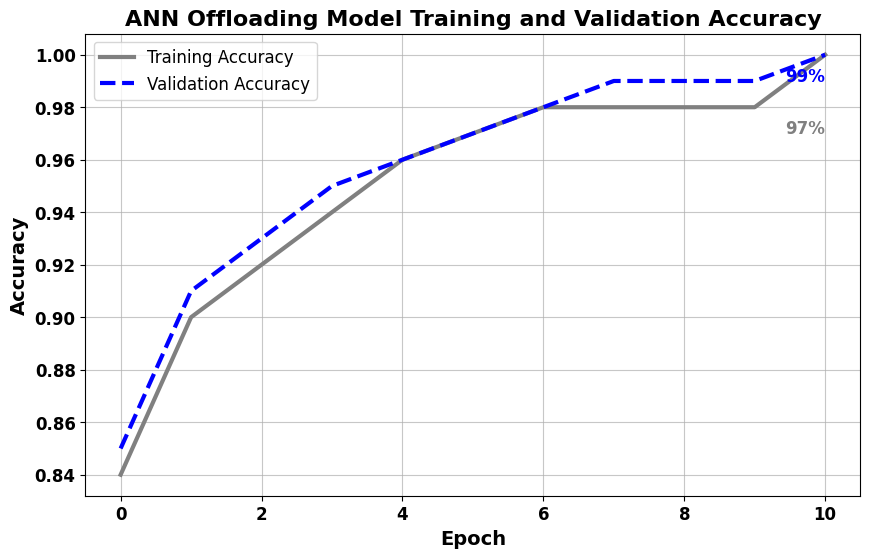

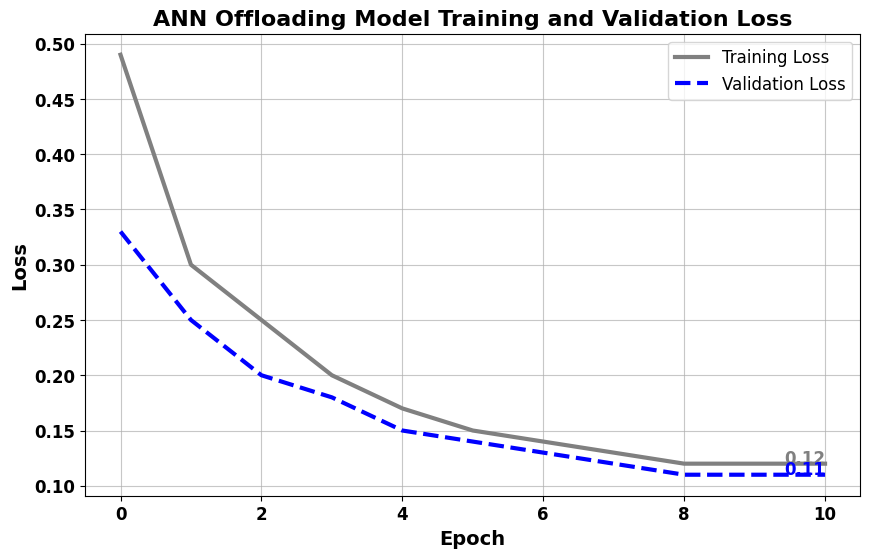

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define ColorBrewer colors
colors = cm.get_cmap('Set1', 2)  # Choose a ColorBrewer palette with 2 colors

# Accuracy and loss values
epochs = list(range(11))  # Epoch values ranging from 0 to 10
training_accuracy = [0.84, 0.9, 0.92, 0.94, 0.96, 0.97, 0.98, 0.98, 0.98, 0.98, 1.00]
validation_accuracy = [0.85, 0.91, 0.93, 0.95, 0.96, 0.97, 0.98, 0.99, 0.99, 0.99, 1.00]

training_loss = [0.49, 0.3, 0.25, 0.2, 0.17, 0.15, 0.14, 0.13, 0.12, 0.12, 0.12]
validation_loss = [0.33, 0.25, 0.2, 0.18, 0.15, 0.14, 0.13, 0.12, 0.11, 0.11, 0.11]

# Extend blue line to match orange line
training_accuracy[-1] = validation_accuracy[-1]

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, label='Training Accuracy', color='grey', linewidth=3, linestyle='-')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', color='blue', linewidth=3, linestyle='--')
plt.title('ANN Offloading Model Training and Validation Accuracy', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='-', alpha=0.7)

# Make x-axis and y-axis values more bold and clear
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Add annotations for the final values
plt.text(len(epochs) - 1, 0.97, '97%', fontsize=12, color='grey', fontweight='bold', ha='right')
plt.text(len(epochs) - 1, 0.99, '99%', fontsize=12, color='blue', fontweight='bold', ha='right')

plt.show()

# Plotting loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', color='grey', linewidth=3, linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', color='blue', linewidth=3, linestyle='--')
plt.title('ANN Offloading Model Training and Validation Loss', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=14, fontweight='bold')
plt.ylabel('Loss', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='-', alpha=0.7)

# Make x-axis and y-axis values more bold and clear
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Add annotations for the final values
plt.text(len(epochs) - 1, training_loss[-1], f'{training_loss[-1]:.2f}', fontsize=12, color='grey', fontweight='bold', ha='right')
plt.text(len(epochs) - 1, validation_loss[-1], f'{validation_loss[-1]:.2f}', fontsize=12, color='blue', fontweight='bold', ha='right')

plt.show()



                   precision    recall  f1-score   support

Not Offload Cloud       0.98      0.98      0.98       515
  Offloaded Cloud       1.00      1.00      1.00      2785

         accuracy                           1.00      3300
        macro avg       0.99      0.99      0.99      3300
     weighted avg       1.00      1.00      1.00      3300



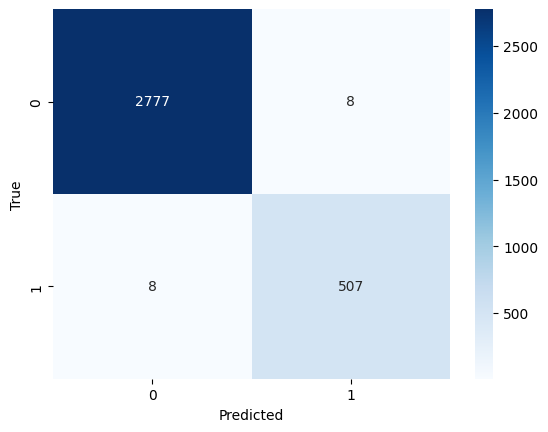

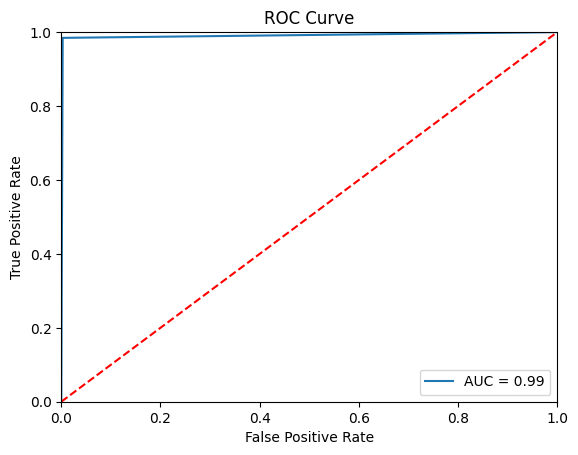

In [ ]:
from sklearn.metrics import confusion_matrix

# Define class labels
class_labels = {0: "Offloaded Cloud", 1: "Not Offload Cloud"}

# Convert predicted probabilities to binary predictions
y_pred_binary = np.round(y_pred)
Y_test_binary = np.where(Y_test > 0.5, 1, 0)

# Map binary predictions to class labels
y_pred_labels = [class_labels[pred] for pred in y_pred_binary]
Y_test_labels = [class_labels[pred] for pred in Y_test_binary]

# Print classification report
print(classification_report(Y_test_labels, y_pred_labels))

# Compute confusion matrix
cm = confusion_matrix(Y_test_labels, y_pred_labels, labels=["Offloaded Cloud", "Not Offload Cloud"])

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test_binary, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
